In [1]:
import IPython
from PIL import Image

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os
from PIL import Image

In [4]:
def load_images(folder_path, size=(244, 244)):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            img = Image.open(os.path.join(folder_path, filename))
            img = img.resize(size)
            img_array = np.array(img)
            images.append(img_array)
    return np.array(images)

In [8]:
fruits_path = '/content/drive/MyDrive/CMPE255/Assignment-6/Fruits'
vegetables_path = '/content/drive/MyDrive/CMPE255/Assignment-6/Vegetables'

In [9]:
Fruits = load_images(fruits_path)
Vegetables = load_images(vegetables_path)

In [20]:
import matplotlib.pyplot as plt

# Display a few images
def display_images(images, title):
    plt.figure(figsize=(10, 10))
    n = len(images)  # Get the number of images
    # Calculate the number of rows and columns for the subplot
    rows = n // 3 + (1 if n % 3 > 0 else 0)
    for i in range(n):
        plt.subplot(rows, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

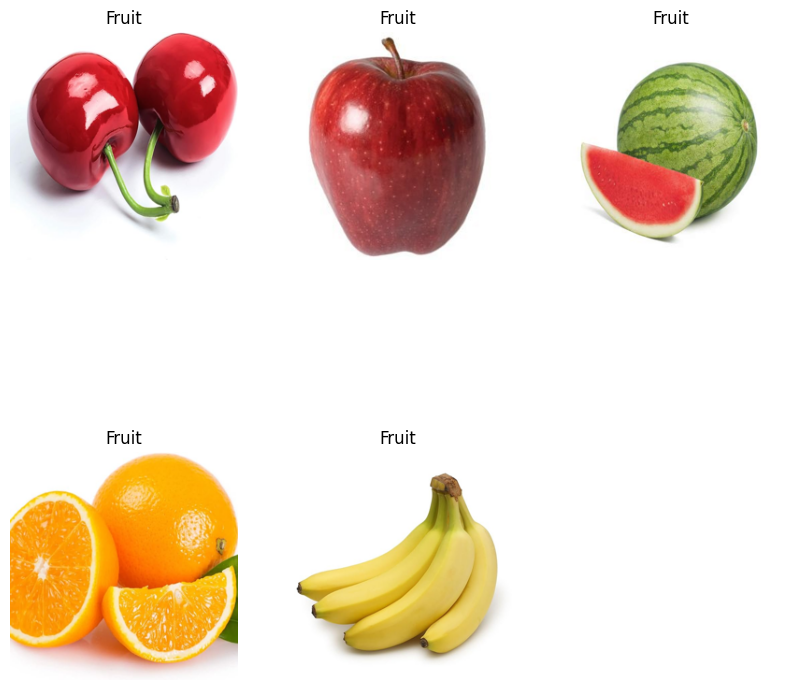

In [21]:
display_images(Fruits, "Fruit")

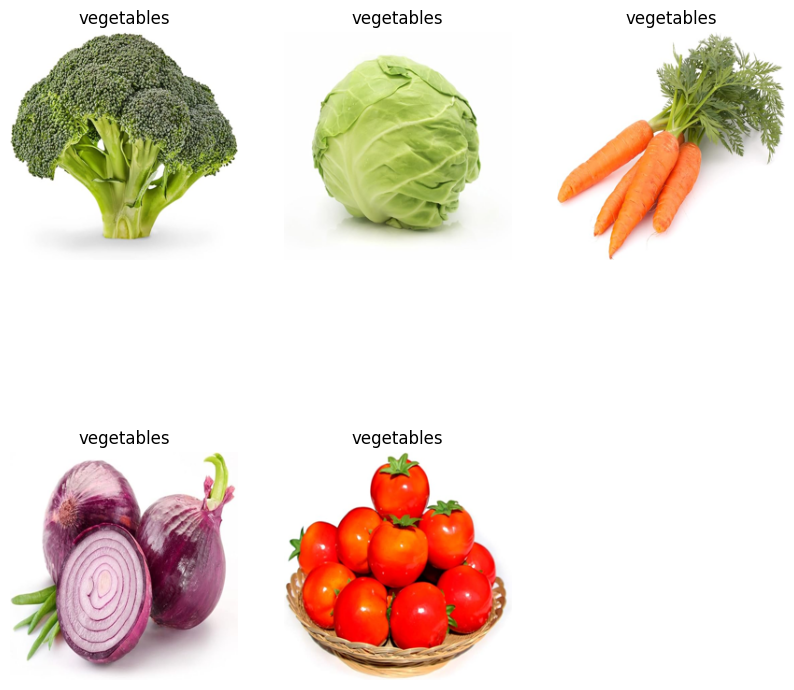

In [22]:
display_images(Vegetables,"vegetables")

# **Feature Extraction**

In [23]:
!pip install tensorflow

In [24]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

# Load VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def extract_features(images):
    images = preprocess_input(images)
    features = model.predict(images)
    features_flatten = features.reshape((features.shape[0], -1))
    return features_flatten

benign_features = extract_features(Fruits)
malignant_features = extract_features(Vegetables)

1/1 [==============================] - 3s 3s/step


# **Clustering**

In [25]:
from sklearn.cluster import KMeans

# Combine features for clustering
all_features = np.concatenate((benign_features, malignant_features), axis=0)

# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(all_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **Visualization and Analysis**

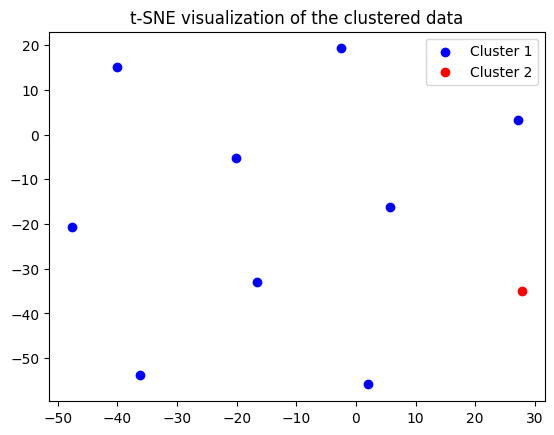

In [31]:
from sklearn.manifold import TSNE

# t-SNE for dimensionality reduction
n_samples = all_features.shape[0]
perplexity_value = min(30, n_samples - 1)  # Commonly used value, adjust as necessary
tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity_value)
reduced_features = tsne.fit_transform(all_features)


# Plot with legend
plt.scatter(reduced_features[kmeans.labels_ == 0, 0], reduced_features[kmeans.labels_ == 0, 1], c='blue', label='Cluster 1')
plt.scatter(reduced_features[kmeans.labels_ == 1, 0], reduced_features[kmeans.labels_ == 1, 1], c='red', label='Cluster 2')
plt.title("t-SNE visualization of the clustered data")
plt.legend()
plt.show()